# Microsoft Movie Studio Recommendations!

Tyrrance Miller Jr. 

## Executive Summary

Microsoft is looking to get involved with movie production and film making by creating a new movie studio. In this project I have explored and analyzed high level characteristics of movies that have done well and have translated those findings into 3 recommendations that I believe will serve Microsoft well as they take on this new venture.

## The Data

The Data being used for this anaylysis was collected from the Box Office Mojo to analyze which movie studios had the highest domestic grossing movies. I also used data from the-numbers.com to gather the release dates that produced the highest profit, and I also use IMDB database to pull the genres with the highest ratings and profits.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Movie Studios With the Highest Domestic Gross

For this first analysis I will gather data to show which studio had the hightest average domestic gross.

In [2]:
bom_movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


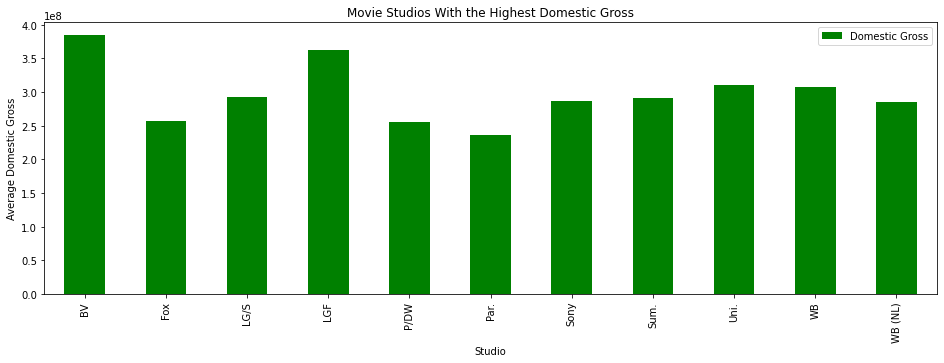

In [3]:
studio = bom_movie_gross.sort_values('domestic_gross', ascending=False)[:100].groupby('studio').mean()['domestic_gross']
studio.plot(kind='bar', figsize=(16,5), xlabel='Studio', ylabel='Average Domestic Gross', title='Movie Studios With the Highest Domestic Gross', color='green')


plt.legend(["Domestic Gross"]);


In [4]:
studio

studio
BV         3.843086e+08
Fox        2.564429e+08
LG/S       2.923000e+08
LGF        3.628750e+08
P/DW       2.562750e+08
Par.       2.364333e+08
Sony       2.869167e+08
Sum.       2.909000e+08
Uni.       3.106600e+08
WB         3.079188e+08
WB (NL)    2.860000e+08
Name: domestic_gross, dtype: float64

In the visualization above we can see that BV(Buena Vista) studios has the highest average domestic gross of $567,800,000 out of the top five studios on the bar graph. This data was produced by taking the top 20 movies that had the highest domestic gross and grouping them by studio, then took the mean of all the domestic gross of the movies produced per studio. With this data, I recommend Microsoft model after BV studios and/or parner with them in some way.
This is essential for knowing how well your competitors are doing.

## Release Date with the Highest Profit

For this analysis I will gather data to show which release date had the highest profit and create another visualization.

In [5]:
tn_movie_budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Explanation of the code below: 'production_budget' and 'worldwide_gross' had data type of string so I had to replace the dollar signs and commas with empty spaces and then convert str to int. Once I did, that I could get the values for the 'movie_profit' column that I created by subtracting 'production_budget' from 'worldwide_gross',

In [6]:
tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].str.replace('$', '')
tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].str.replace(',', '')

tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].str.replace('$', '')
tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].str.replace(',', '')


/tmp/ipykernel_47/3377835611.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].str.replace('$', '')
/tmp/ipykernel_47/3377835611.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].str.replace('$', '')


In [7]:
tn_movie_budget['production_budget'] = tn_movie_budget['production_budget'].astype(int)
tn_movie_budget['worldwide_gross'] = tn_movie_budget['worldwide_gross'].astype(int)

                             
tn_movie_budget['movie_profit'] = tn_movie_budget['worldwide_gross'] - tn_movie_budget['production_budget']                             
tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,-7000
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,-3662
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,-1400


In [8]:
tn_movie_budget['release_date'].sort_values()[:100]

5559     Apr 1, 1975
5520     Apr 1, 1986
2260     Apr 1, 1988
5769     Apr 1, 1996
1408     Apr 1, 2005
            ...     
4955    Apr 15, 1998
4953    Apr 15, 2005
4946    Apr 15, 2005
2757    Apr 15, 2005
4756    Apr 15, 2008
Name: release_date, Length: 100, dtype: object

In [10]:
month = tn_movie_budget['release_date'].str.split(pat= ' ', n=1, expand=True)
month

,0,1
0,Dec,"18, 2009"
1,May,"20, 2011"
2,Jun,"7, 2019"
3,May,"1, 2015"
4,Dec,"15, 2017"
...,...,...
5777,Dec,"31, 2018"
5778,Apr,"2, 1999"
5779,Jul,"13, 2005"
5780,Sep,"29, 2015"


In [11]:
tn_movie_budget['month'] = pd.DatetimeIndex(tn_movie_budget['release_date']).month
tn_movie_budget['month']

0       12
1        5
2        6
3        5
4       12
        ..
5777    12
5778     4
5779     7
5780     9
5781     8
Name: month, Length: 5782, dtype: int64

In [12]:
tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_profit,month
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625",2776345279,2351345279,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875,635063875,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350",149762350,-200237650,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868",1403013963,1072413963,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747,999721747,12
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,$0,0,-7000,12
5778,79,"Apr 2, 1999",Following,6000,"$48,482",240495,234495,4
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,"$1,338",1338,-3662,7
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,$0,0,-1400,9


In [13]:
profit2 = tn_movie_budget.sort_values('movie_profit', ascending=False).groupby('month').mean()['movie_profit']


profit2

month
1     2.572033e+07
2     4.349811e+07
3     4.985129e+07
4     3.611743e+07
5     1.151328e+08
6     9.942391e+07
7     9.841746e+07
8     3.542232e+07
9     2.488078e+07
10    2.907190e+07
11    9.314157e+07
12    6.844157e+07
Name: movie_profit, dtype: float64

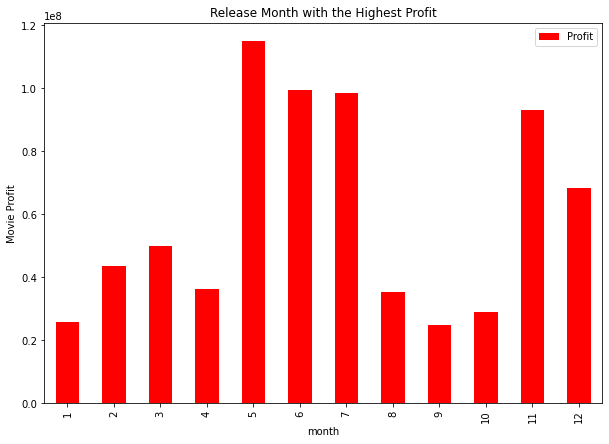

In [24]:
profit2.plot(kind='bar', figsize=(10, 7), xlabel='month', ylabel='Movie Profit', title='Release Month with the Highest Profit', color='red')

plt.legend(["Profit"]);




In the visualization above we see the month of may being the month with the highest proft for release dates

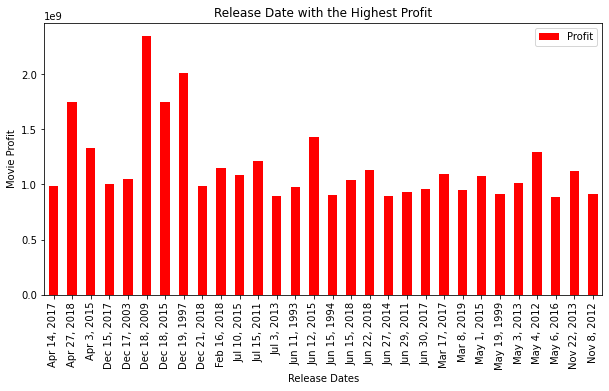

In [15]:
profit = tn_movie_budget.sort_values('movie_profit', ascending=False)[:30] .groupby('release_date').mean()['movie_profit']
profit.plot(kind='bar', figsize=(10, 5), xlabel='Release Dates', ylabel='Movie Profit', title='Release Date with the Highest Profit', color='red')

plt.legend(["Profit"]);

In the next visualization I broke down the data to see which release date produced the highest profit thus revealing which date would be best date to release movies. I found the profit by subtracting the production budget from the worldwide gross. After pulling the profit I was able to generate a visualization (bar graph) which shows the dates Dec.18,2009, Dec.18,2015 Dec.19,1997 as the dates with the highest result for profit. So according to this analysis the best time to release movies would be around December 18th or 19th.

This Data is important from a business perspective Because of the time and money that is put into making the films you want to make sure that you have the optimum opening Date especially due to other studio competion.

## Average Rating of Movie Genres

In the last analysis I will gather data to show which Genre had the hightest average rating.

In [30]:
! unzip -n zippedData/im.db.zip

Archive:  zippedData/im.db.zip


In [11]:
import sqlite3

In [12]:
conn = sqlite3.connect("im.db")

In [13]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [14]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [15]:
q = """
SELECT 
    b.movie_id,
    r.averagerating,
    b.genres
FROM movie_basics AS b
JOIN movie_ratings AS r ON
b.movie_id = r.movie_id  
GROUP BY genres
"""
rg = pd.read_sql(q,conn)
rg

,movie_id,averagerating,genres
0,tt0253093,6.6,None
1,tt0364201,6.4,Action
2,tt6848590,3.4,"Action,Adult,Comedy"
3,tt1136688,3.3,"Action,Adventure"
4,tt0448694,6.6,"Action,Adventure,Animation"
...,...,...,...
919,tt0293069,6.6,Thriller
920,tt1561768,6.1,"Thriller,War"
921,tt1530983,6.4,"Thriller,Western"
922,tt1512306,9.0,War


In [36]:
rg['genre_lst'] = rg['genres'].str.split(',')

In [37]:
rg.explode('genre_lst')

,movie_id,averagerating,genres,genre_lst
0,tt0253093,6.6,None,None
1,tt0364201,6.4,Action,Action
2,tt6848590,3.4,"Action,Adult,Comedy",Action
2,tt6848590,3.4,"Action,Adult,Comedy",Adult
2,tt6848590,3.4,"Action,Adult,Comedy",Comedy
...,...,...,...,...
920,tt1561768,6.1,"Thriller,War",War
921,tt1530983,6.4,"Thriller,Western",Thriller
921,tt1530983,6.4,"Thriller,Western",Western
922,tt1512306,9.0,War,War


In [38]:
exploded_df = rg.explode('genre_lst')

In [39]:
exploded_df.groupby('genre_lst').mean()['averagerating']

genre_lst
Action         5.882353
Adult          2.700000
Adventure      6.292143
Animation      6.360177
Biography      6.668421
Comedy         6.207027
Crime          6.067241
Documentary    7.378613
Drama          6.325581
Family         6.120661
Fantasy        6.210256
Game-Show      7.300000
History        6.455752
Horror         5.361600
Music          6.637500
Musical        6.322785
Mystery        6.180734
News           6.861765
Reality-TV     6.460000
Romance        6.083607
Sci-Fi         5.887736
Short          8.800000
Sport          6.362295
Thriller       6.123622
War            6.554688
Western        6.084615
Name: averagerating, dtype: float64

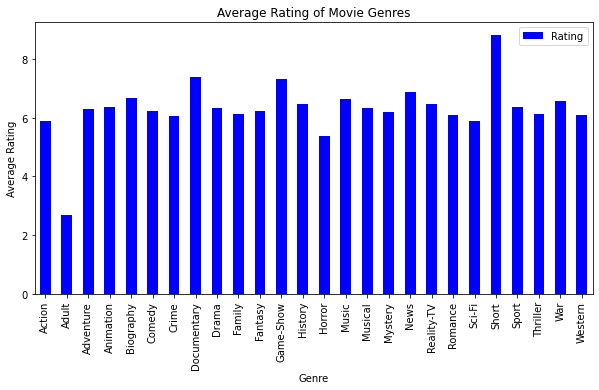

In [40]:
exploded_df.groupby('genre_lst').mean()['averagerating'].plot(kind ='bar', figsize=(10, 5), xlabel='Genre', ylabel='Average Rating', title='Average Rating of Movie Genres', color= 'blue')


plt.legend(["Rating"]);

For this last visualization above we can see that Short films have the highest rating for genres. The process of producing this was to first pull two data tables for both movie_basics and movie_ratings and join them together to get the average rating and genres on the same table. I then had to apply the pd.exploxde method to split the list of genres because there were many movies grouped into more than one genre. I then grouped all of the genres based on the highest averagerating to get the mean of all average ratings per genre. After this process I was able to produce this bar graph with showed the all of the genres and their ratings. So my last recommendation for this analysis is to focus on producing short films.

This analysis is important and essential for knowing who your target is audience and what kind of films they enjoy!

## Conclusion 

As Microsoft moves foward into this exciting venture I believe these three recommendations will be of great value to the company and will play a huge part in the success of this journey! Best of Luck!!